# Kernels and Hyperparameters
The beahviour of a Gaussian Proces (GP) is influcend by its hyperparameters and the kernel chosen to represent the covariance function. This notebook will illustrate the influence different hyperparameters and kernels have on the predictive qualities of the GP. Part 1 illustrates the influence of the kernel on the prior and posterior with fixed hyperparameters. Also discussed are the kernels hyperparametes on different kernels (Part 2).

In [2]:
import utils
import gpflow
import numpy as np
import matplotlib
import math
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# Launch the graph in a session.
sess = tf.Session()

In [3]:
fontsize_label = 24
fontsize_legend = 20
fontsize_ticks = 20
linewidth = 2.3
markeredgewidth = 3
markersize = 15 
matplotlib.rcParams['figure.figsize'] = (16, 8)

## Part 1 - Kernels and Priors 
In this part we will talk about common kernels, their hyperparameters and what properties they represent. The kernels in this examples (SE and Matérn) are stationary (see **Introduction into kernels**) and their influence on the Gaussian Process Prior is shown.

### Introduction into kernels
Kernels give us the possibility to encode knowledge about the target function into our predictor. Often similarity between data points is a crucial for the performance and thus we need a way of defining its influence on a GP. Underlying is the intuition that points which are close to each other should produce similar output values . In the context of Gaussian Processes similarity or nearness is controlled by the covariance function. 

If a covariance functions depends only on the distance $x-x'$ it is called a stationary. A good example for a stationary covariance function is the squared exponential covariance function (introduced later). If further the function depends only on $\big|x-x'\big|$ the function is called isotropic. Again the squared exponential is a good example for such a function. Those kind of functions are often called *radial basis functions* (RBF) or RBF-Kernels.

### Examples of stationary Covariance Functions
We consider covariance functions with an input space $\mathcal{X} \in \mathbb R^D$ where $D \in \mathbb N$. Since stationary covariance functions depend only on the absolute distance between two points $x \in \mathcal{X}$, $x' \in \mathcal{X}$ it is possible to write $k(r)$ with $r = x - x'$. We also define $\sigma_f^2 = 1$.

#### Squared Exponential Covariance Function
The squared exponential (SE) covariance function is defined as
\begin{equation*}
k_{SE}(r) = \sigma_f^2 \exp \big(-\frac{r^2}{2\mathcal{l}^2}\big)
\end{equation*}
where $\mathcal{l}$ is the so called *characteristic length-scale* and $\sigma_f^2$ is a positive process variance. This function is infinitely differentiable and is thus very smooth and probably the most used kernel in the kernel machines field.

The following code produces a figure visualizing the influcence of the *characteristic length-scale* on the covariance function, a prior drawn from a Gaussian Process with a SE covariance function and a posterior after observing data from the ground truth $y_{true} = \sin(2\pi)$ assuming no noise in the observations ($\sigma_n^2 = 0.0$).

#### The Matérn Class 
The Matérn class of covariance function is given by
\begin{equation*}
k_{Matern}(r) = C_\nu(d) = \sigma_f^2\frac{2^{1-\nu}}{\Gamma(\nu)}\Bigg(\frac{\sqrt{2\nu}r}{\mathcal{l}}\Bigg)^\nu K_\nu\Bigg(\frac{\sqrt{2\nu}r}{\mathcal{l}}\Bigg)
\end{equation*}
where $K_\nu$ is a modified Bessel function. For $\nu \to \infty$ this becomes the SE covariance function. The functions becomes simple for half integer values $\nu = p + \frac{1}{2}$ where $p$ is a non-negative integer. The function then becomes a product of an exponential and a polynomial of order $p$. Most common choices of $\nu$ include  $\nu=\frac{3}{2}$ and $\nu=\frac{5}{2}$ for which the function becomes 
\begin{equation*}
k_{3/2}(r) = \Bigg( 1 + \frac{\sqrt3r}{\mathcal{l}} \Bigg) \exp \Bigg( - \frac{\sqrt3r}{\mathcal{l}} \Bigg)
\end{equation*}
and 
\begin{equation*}
k_{5/2}(r) = \Bigg( 1 + \frac{\sqrt5r}{\mathcal{l}} + \frac{\sqrt5r^2}{3\mathcal{l}^2} \Bigg) \exp \Bigg( - \frac{\sqrt5r}{\mathcal{l}} \Bigg)
\end{equation*}

In [4]:
# Create data set
sigma_n = 0.0
N = 2000
num_Functions = 10
# Build input space
X = np.linspace(0., 5., N).reshape(N, 1)
# Y_true = np.sin(X * (2 * math.pi))
# X_sample = np.random.uniform(-3.,3.,(N,1))
# Y_sample = np.sin(X_sample * (2 * math.pi))

#### Random functions from kernels
Now we will look at the functions a kernel can produce. We will take a closer look at the SE, Matérn32 and Matérn52 kernel. The hyperparameters will be fixed for better comparability.

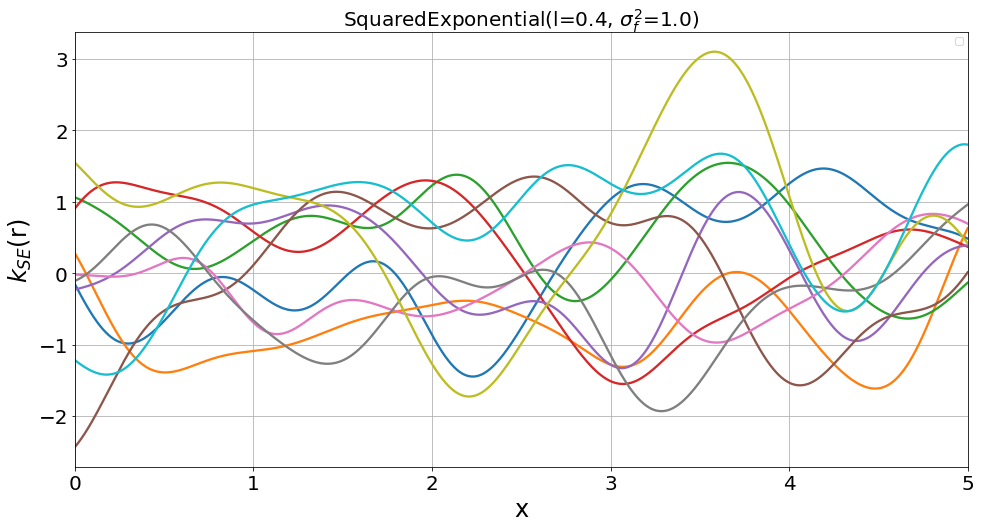

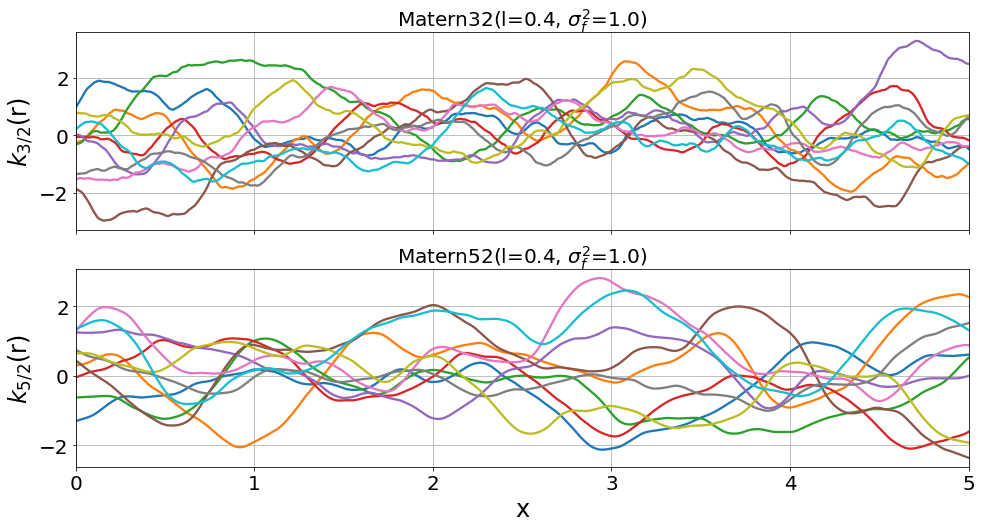

In [5]:
# Draw random functions form kernel
lengthscale = 0.4
k = gpflow.kernels.RBF(1, lengthscales=lengthscale)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)
utils.plotRandomFunction(X, [Y_drawn], [k], labels=[None])
plt.ylabel('$k_{SE}$(r)', fontsize=fontsize_label)
f = plt.gcf()
f.savefig("Squarred_Exponential_random functions.pdf", bbox_inches='tight')


fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
ax = ax.reshape(2,1)
# Draw random functions form kernel
lengthscale = 0.4
k = gpflow.kernels.Matern32(1, lengthscales=lengthscale)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
#plotRandomFunction(X, [Y_drawn], [k], labels=[None])
#f = plt.gcf()
#f.savefig("Matern32_random functions.pdf", bbox_inches='tight')
ax[0,0].plot(X,Y_drawn,lw=linewidth)
ax[0,0].set_title('Matern32(l=0.4, $\sigma_f^2$=1.0)',fontsize=fontsize_legend)
ax[0,0].set_ylabel('$k_{3/2}$(r)', fontsize=fontsize_label)
ax[0,0].grid()
ax[0,0].tick_params(axis='both', which='both', labelsize=fontsize_ticks)
# Draw random functions form kernel
lengthscale = 0.4
k = gpflow.kernels.Matern52(1, lengthscales=lengthscale)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
# plotRandomFunction(X, [Y_drawn], [k], labels=[None])
# f = plt.gcf()
# f.savefig("Matern52_random functions.pdf", bbox_inches='tight')
ax[1,0].plot(X,Y_drawn,lw=linewidth)
ax[1,0].set_title('Matern52(l=0.4, $\sigma_f^2$=1.0)',fontsize=fontsize_legend)
ax[1,0].set_xlabel('x', fontsize=fontsize_label)
ax[1,0].set_ylabel('$k_{5/2}$(r)', fontsize=fontsize_label)
ax[1,0].grid()
ax[1,0].tick_params(axis='both', which='both', labelsize=fontsize_ticks)
ax[1,0].set_xlim([X[0], X[-1]])
fig.savefig("Matern_random functions.pdf", bbox_inches='tight')

                             class prior transform  trainable shape  \
GPR/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve       True    ()   

                         fixed_shape value  
GPR/kern/lengthscales           True   0.4  
GPR/kern/variance               True   0.8  
GPR/likelihood/variance         True   0.0  


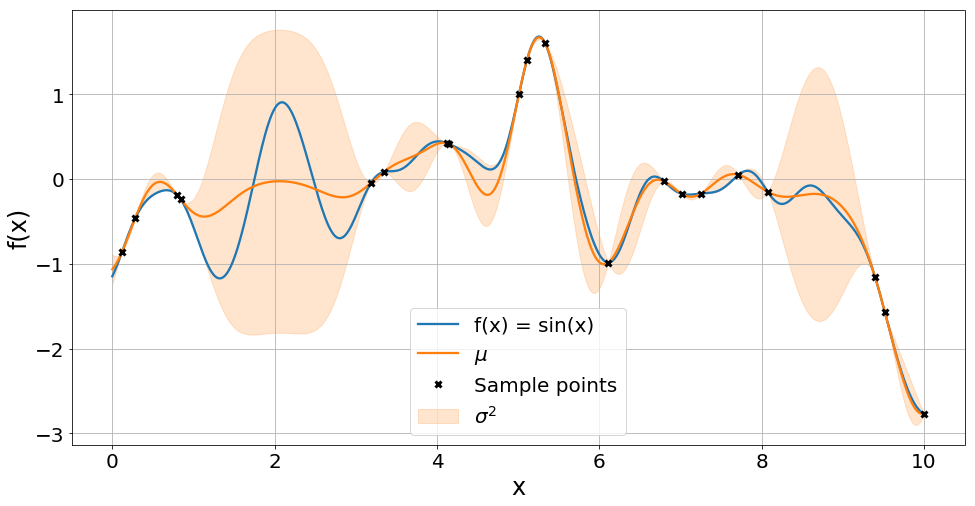

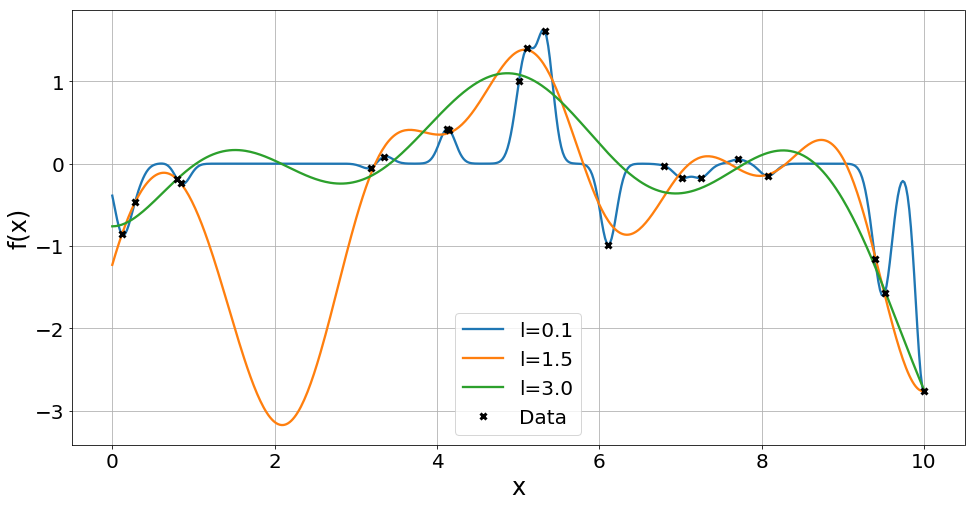

In [6]:
# Generate data
np.random.seed(9)
# Set some parameters
f = 0.5
N = 10.
lengthscale = 0.4
num_Functions = 1
num = 500
sigma_n = 0.0
sigma_f = 0.8
# Build data sets
X = np.linspace(0., N, num).reshape(num, 1)
k = gpflow.kernels.RBF(1, lengthscales=lengthscale)
Y_true = utils.drawRandomFunction(k, X, num_Functions) 

size = 20
np.random.seed(12)
index = np.random.choice(range(len(X)), size=size, replace=False)
X_sample = X[index]
Y_sample = Y_true[index]

# Change noise parameter
sigma_n = 0.0
# Construct models with initial guess
m = gpflow.models.GPR(X_sample, Y_sample, kern=k)
m.likelihood.variance = sigma_n
m.kern.variance = sigma_f 
m.compile()
# Print out model
print(m)

# Predict with model
mean, var = m.predict_y(X)
fig = utils.plot2D(mean, var, X, [X, Y_true, 'f(x) = sin(x)'], [X, mean, '$\mu$'], 
             [X_sample, Y_sample, 'Sample points', 'kx'])

#Draw random functions form kernel
scales = [0.1, 1.5, 3.]
means = []
for scale in scales:
    k = gpflow.kernels.RBF(1, lengthscales=scale)
    m = gpflow.models.GPR(X_sample, Y_sample, kern=k)
    m.likelihood.variance = sigma_n
    m.kern.variance = sigma_f 
    m.compile()
    mean, var = m.predict_y(X)
    means.append(mean)

fig = utils.plot2D(None, None, X, [X, means[0], 'l='+str(scales[0])], [X, means[1], 'l='+str(scales[1])],
             [X, means[2], 'l='+str(scales[2])], [X_sample, Y_sample, 'Data', 'kx'])
f = plt.gcf()
f.savefig("LengthScalPrediction.pdf", bbox_inches='tight')

## Part 2 - Hyperparameters
#### Characteristic length-scale
This step will show the influence of the *characteristic length-scale* $l$ of the covariance functions shown above. The function value $k(r)$ is the value of the covariance function in terms of the distance $r = x - x'$ between two points.

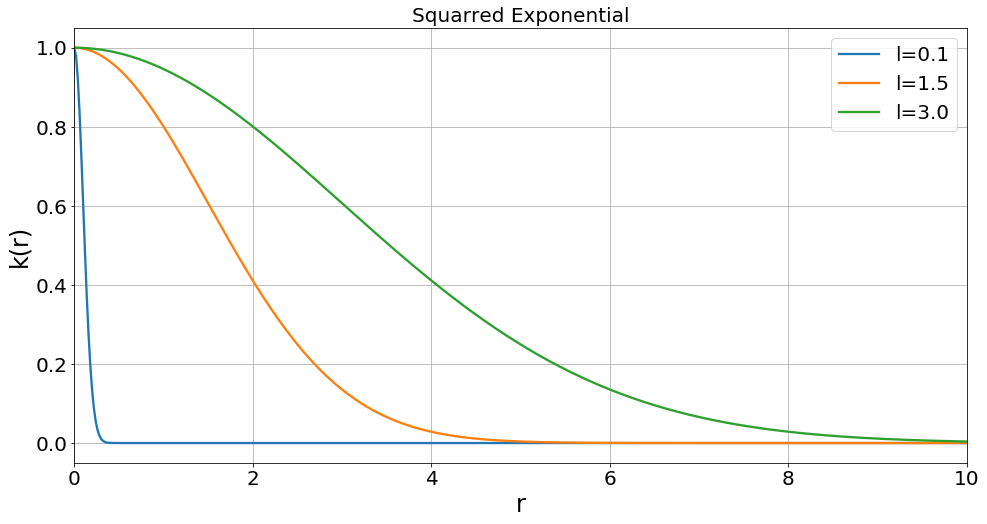

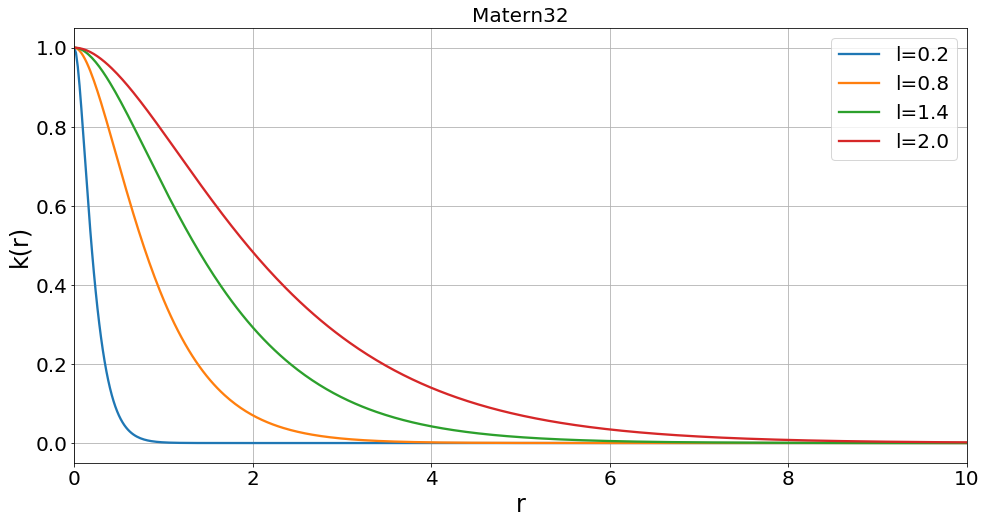

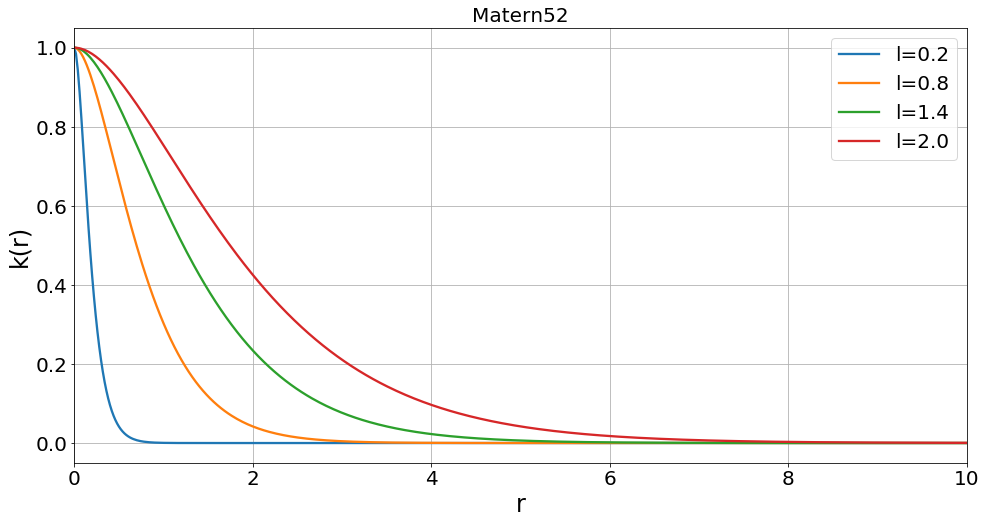

In [7]:
num_Functions = 10

# Plot influence of length scales
scales = np.array([0.1, 1.5, 3.0])
Y = [utils.lengthScale_SE(X, l) for l in scales]
utils.plotLengthScales(X, Y, scales, 'Squarred Exponential')
f = plt.gcf()
f.savefig("Squarred_Exponential.pdf", bbox_inches='tight')

# Plot influence of length scales
scales = np.array([0.2, 0.8, 1.4, 2.0])
Y = [utils.lengthScale_Matern(X, l, p=3.) for l in scales]
utils.plotLengthScales(X, Y, scales, 'Matern32')

# Plot influence of length scales
scales = np.array([0.2, 0.8, 1.4, 2.0])
Y = [utils.lengthScale_Matern(X, l, p=5.) for l in scales]
utils.plotLengthScales(X, Y, scales, 'Matern52')

You have seen random functions drawn from three different kernels. Note that the SE kernel produces the "smoothest" functions while the Matern32 produces the roughest function. Interesting fact: According to C. E. Rasmussen & C. K. I. Williams (http://www.gaussianprocess.org/gpml/) the higher the $\nu$-Value in the Matern function the more smooth it gets and is therefore harder to distinguish when compared to the SE kernel. In the case of $\nu \geq 7/2$ it is hard to distinguish between finite $\nu$ and $\nu \to \infty$.<br/>
As already mentioned, this knowledge about how random functions drawn from a kernel behave, enables us to incoporate prior expertise about the underlying true function. 

Also shown was the impact of the of the *lengthscale* parameter on the covariance function. This parameter represents the scaling of the distance $r$ between two points. Informally the lengthscale defines how far you have to move on one axis (in 1D case $x$ axis) for values r to become uncorrelated. Therefore it is valid to say that the higher $l$ the smaller $r/l$ will be and a slightly greater distance $r$ between two points matters less. This will then result in functions that look somewhat linear for the range of the input  data.<br/>
The graphs of the $l$-influence look similar but vary a little bit if you would plot them into one figure for a specific $l$.

As of now we have only looked at widely used kernels in Machine Learning. But there are also other sorts kernels which be particularly usefull when creating custom kernels (also discussed in http://www.gaussianprocess.org/gpml/ but not here). Random functions drawn from a few of them are shown below. For further informations please take a look at http://www.gaussianprocess.org/gpml/.

#### Samples from other kernels

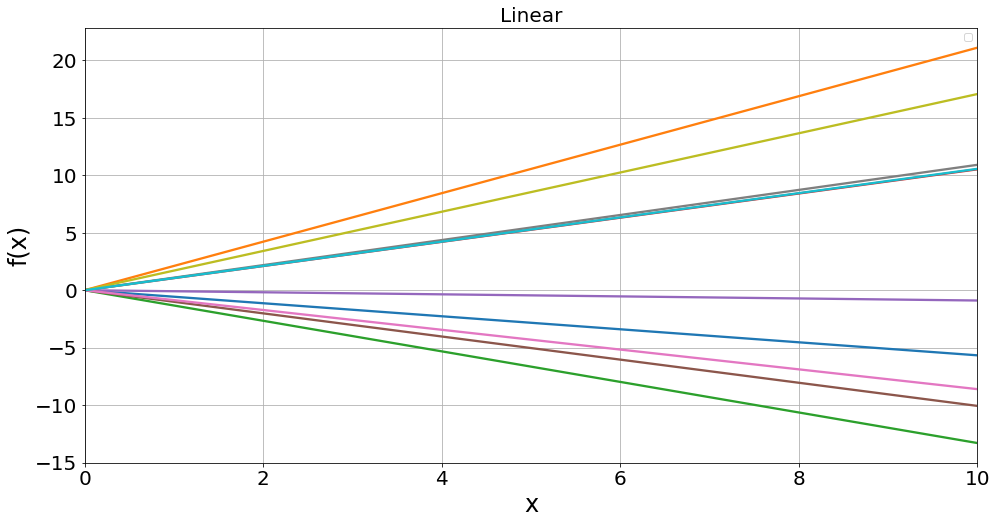

In [8]:
# Draw random functions form kernel
k = gpflow.kernels.Linear(1)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
utils.plotRandomFunction(X, [Y_drawn], [k], [None])

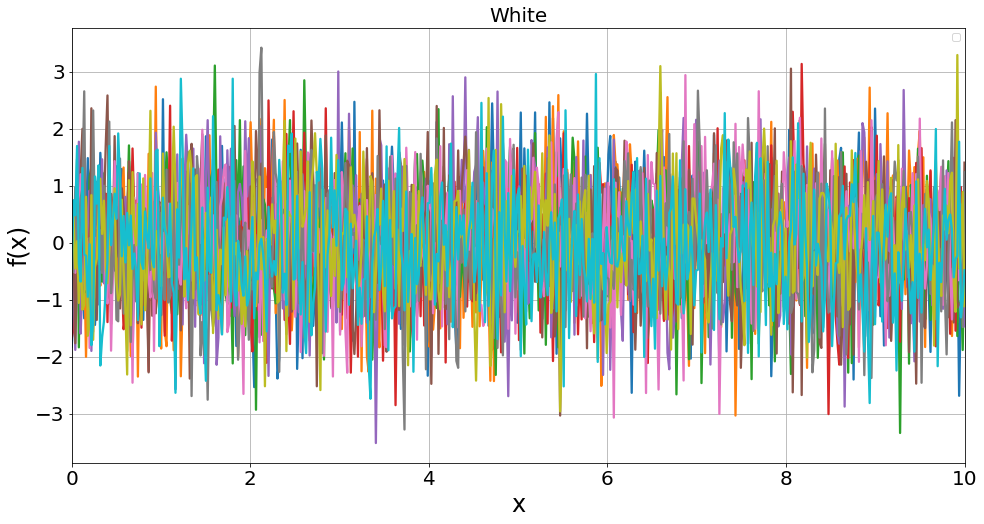

In [9]:
# Draw random functions form kernel
k = gpflow.kernels.White(1,variance=1.0)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
utils.plotRandomFunction(X, [Y_drawn], [k], [None])

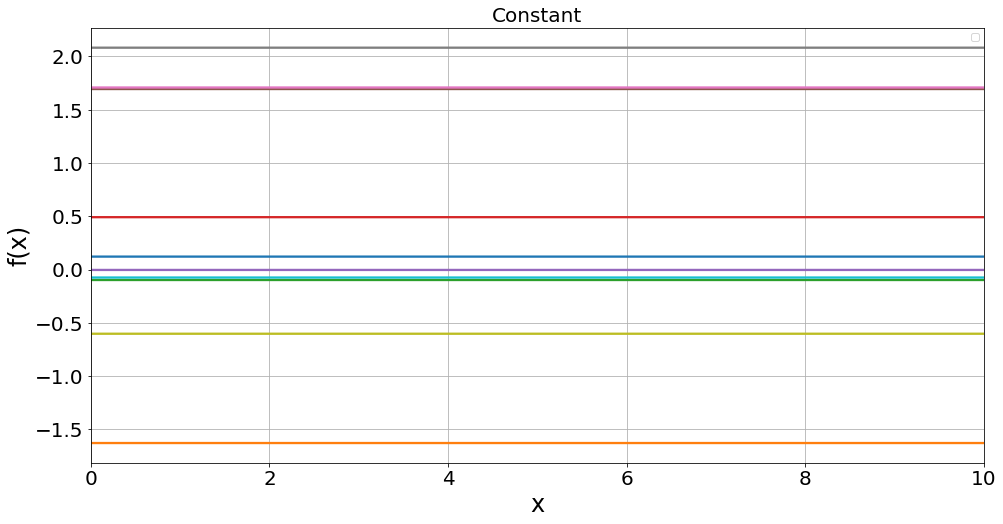

In [10]:
# Draw random functions form kernel
k = gpflow.kernels.Constant(1,variance=1.0)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
utils.plotRandomFunction(X, [Y_drawn], [k], [None])

/home/christoph/Desktop/Masterarbeit/Code/Tutorials/utils.py:72: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(np.zeros(X.shape[0]), K, num_Functions).T


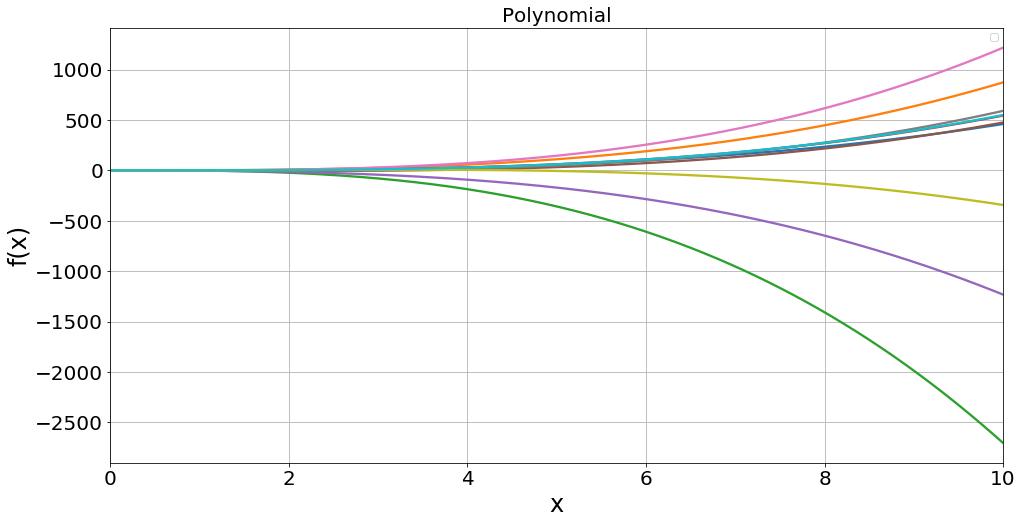

In [11]:
# Draw random functions form kernel
k = gpflow.kernels.Polynomial(1,variance=1.0)
Y_drawn = utils.drawRandomFunction(k, X, num_Functions)  
utils.plotRandomFunction(X, [Y_drawn], [k], [None])

#### Signal variance
In this step we will take a look at the influence of the expected signals variance $\sigma_f^2$. To show the influence the signal variance of the RBF function will be altered and plotted. Its impact and intuition will be discussed afterwards.

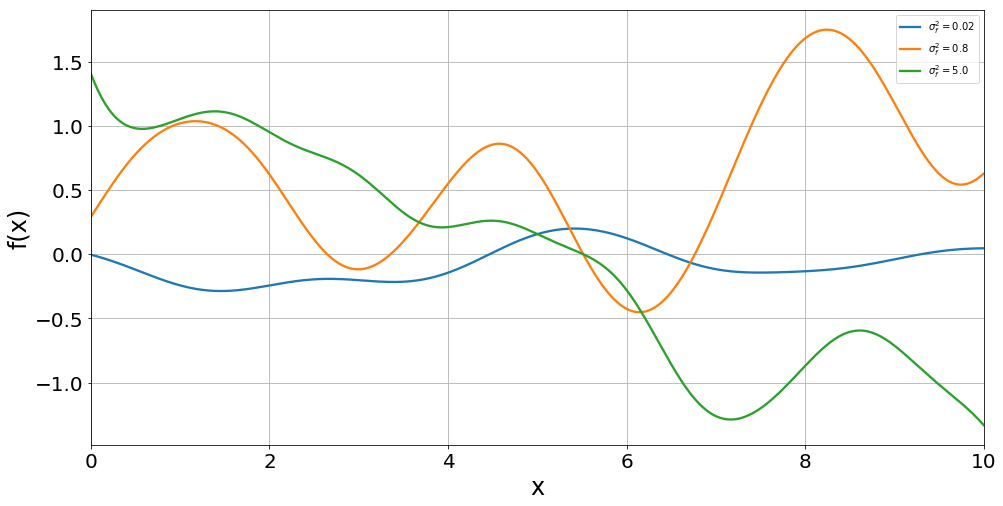

In [12]:
# Draw random functions form kernel
num_Functions = 1
lengthscale = 1.
sigma_f = 0.02
k1 = gpflow.kernels.RBF(1, lengthscales=lengthscale, variance=sigma_f)
Y_drawn1 = utils.drawRandomFunction(k1, X, num_Functions)  
# utils.plotRandomFunction(X, [Y_drawn1], [k1], [None])
# f = plt.gcf()
# f.savefig("sigma_f_00.pdf", bbox_inches='tight')
sigma_f = 0.8
k2 = gpflow.kernels.RBF(1, lengthscales=lengthscale, variance=sigma_f)
Y_drawn2 = utils.drawRandomFunction(k2, X, num_Functions)  
# utils.plotRandomFunction(X, [Y_drawn2], [k2], [None])
# f = plt.gcf()
# f.savefig("sigma_f_04.pdf", bbox_inches='tight')
sigma_f = 5.
k3 = gpflow.kernels.RBF(1, lengthscales=lengthscale, variance=sigma_f)
Y_drawn3 = utils.drawRandomFunction(k3, X, num_Functions)  
# utils.plotRandomFunction(X, [Y_drawn3], [k3], [None])
# f = plt.gcf()
# f.savefig("sigma_f_50.pdf", bbox_inches='tight')

utils.plotRandomFunction(X, [Y_drawn1,Y_drawn2,Y_drawn3], [k1,k2,k3], 
                   ['$\sigma_f^2=0.02$','$\sigma_f^2=0.8$','$\sigma_f^2=5.0$'])
plt.title('')
f = plt.gcf()
f.savefig("sigma_f.pdf", bbox_inches='tight')

Note how the plots look very similar at first until you notice the range of $f(x)$. It is obvious that $\sigma_f^2$ is a scaling parameter to the whole value of the function value which is also implemented like this in the used GPFlow library. From that a common way of notation is inherited: $f(r) = \sigma_f^2 k(r)$ where $k(r)$ is the covariance function with respect to $r$. We expect most function values to be within $2\sqrt{\sigma_f^2}$ around the mean of the GP ($0$ in this case).


#### Noise variance
The last parameter we examine is the noise variance $\sigma_n^2$. This is not a direct parameter of the GP but a parameter of the likelihood function and is a measure which indicates how much measurement noise the observations contain. Therefore it is also a way of incorporating prior knowledge.<br/>
It changes the measurement model from some function (e.g.: $\sin(x)$) from 
\begin{equation*}
y_i = \sin(2\pi x)
\end{equation*}
to 
\begin{equation*}
y_i = \sin(2\pi x) + \epsilon\\
\epsilon \sim \mathcal{N}(0,\sigma_n^2)
\end{equation*}
where $\epsilon \sim \mathcal{N}(0,\sigma_n^2)$ is Gaussian noise with mean 0 and variance $\sigma_n^2$.

The following plots show how the posterior changes for a GP with zero mean and a Mater32 kernel depending on $\sigma_n^2$. The lengthscale and the singals variance are fixed to $l=0.4$ and $\sigma_f^2=0.0$ for comparability.


In [13]:
np.random.seed(9)
# Create data set
N = 2000
N_samples = 20
num_Functions = 10
# Build input space
f = 0.5
X = np.linspace(-5., 5., N).reshape(N, 1)
Y_true = np.sin(X * (2 * math.pi * f))
X_sample = np.random.uniform(-5.,5.,(N_samples,1))
Y_sample = np.sin(X_sample * (2 * math.pi * f))
print(X_sample)

[[-4.89625846]
 [ 0.01874592]
 [-0.04226707]
 [-3.66170471]
 [-3.57888915]
 [-2.81441324]
 [-0.81491819]
 [-2.51898832]
 [-4.15940349]
 [-1.5450136 ]
 [-3.33223653]
 [ 3.78559086]
 [ 4.50964032]
 [-4.61251624]
 [ 1.99107391]
 [ 0.72759816]
 [ 3.98007118]
 [ 1.66898973]
 [ 0.47837783]
 [ 2.02427424]]


In [14]:
# Construct models with initial guess
sigma_n = 0.0
sigma_f = 1.
lengthscale = 0.4
k = gpflow.kernels.RBF(1, lengthscales=lengthscale, variance=sigma_f)
m = gpflow.models.GPR(X_sample, Y_sample, kern=k)
m.likelihood.variance = sigma_n
m.compile()
# Print out model
m

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.4
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.0


In [15]:
# Predict with model
mean_00, var_00 = m.predict_y(X)

In [16]:
sigma_n = 0.2
m.likelihood.variance = sigma_n
m.compile()
# Print out model
m

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.4
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.2


In [17]:
# Predict with model
mean_02, var_02 = m.predict_y(X)

In [18]:
sigma_n = 0.8
m.likelihood.variance = sigma_n
m.compile()
# Print out model
m

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.4
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.8


In [19]:
# Predict with model
mean_08, var_08 = m.predict_y(X)

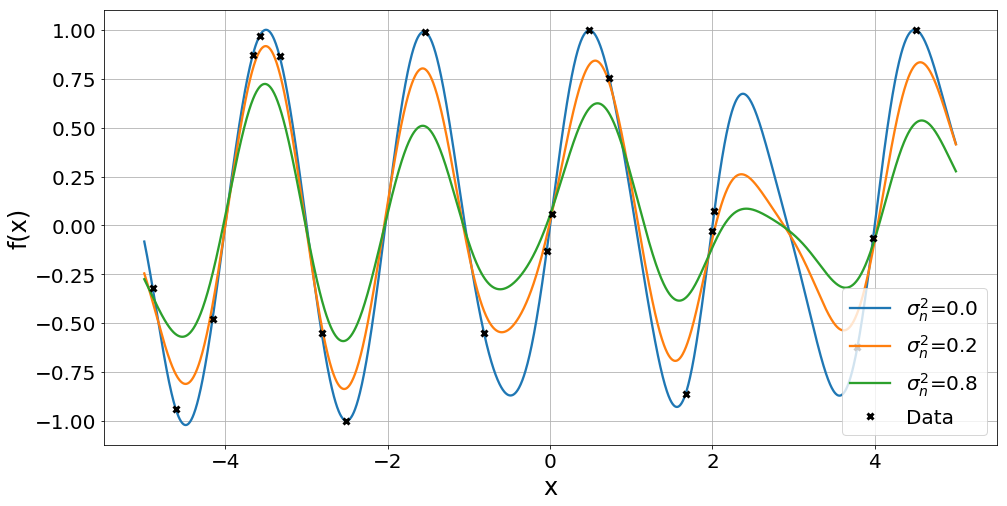

In [20]:
# Plot persteriors
fig = plt.figure()
# Ground truth
#plt.plot(X, Y_true, label="$\sin(2 \pi f x)$", lw=linewidth)
# Different posteriors
plt.plot(X, mean_00, lw=linewidth, label='$\sigma_n^2$={0}'.format(str(0.0)))
plt.plot(X, mean_02, lw=linewidth, label='$\sigma_n^2$={0}'.format(str(0.2)))
plt.plot(X, mean_08, lw=linewidth, label='$\sigma_n^2$={0}'.format(str(0.8)))
# Data
plt.plot(X_sample, Y_sample, 'kx', mew=markeredgewidth, label="Data", lw=linewidth)
# Format plot
plt.legend(prop={'size': fontsize_legend}, loc=4)
plt.xlabel('x', fontsize=fontsize_label)
plt.ylabel('f(x)', fontsize=fontsize_label)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.grid()
f = plt.gcf()
f.savefig("sigma_n.pdf", bbox_inches='tight')

If the measurement noise is $0.0$, the posterior mean function of the GP will pass through all observations. This may require a complex function with many changes in direction. If the measurement noise is big, the posterior mean function will not necessarily pass through the observations but prefer a more simple model that smoothes out the noisy observations. 